In [8]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

import itertools as it
import time
import random

from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Mediation Driven Attachment Model

Mediation Driven Attachment Model was proposed by Kamrul Hassan and Liana Islam in 2014 and
it follows the rule of preferential attachment.
Suppose the number of connections of joining existing nodes for an incoming node is m, each new
node needs to choose an existing node at random as a mediator, then the new node connects not with the
mediator but with m of mediator’s neighbors randomly. For each node, higher degree means that it has
higher chance to link with the incoming node since it has connected with more mediators. Suppose there
are N existing nodes and consider the node i (i <= N) with degree k. Consequently, it has k neighbors.
Assume that its neighbors have degree $k_{1}, k_{2}, \dots, k_{k_{i}}$. Therefore, the probability of picking up the node i
is:
$$\frac{\sum_{j=1}^{ki} k_{j}^{-1}}{N}$$

Algorithm of mediation driven attachment model:
1. Generate a small square matrix of size $m_{0}$ ($m_{0}$ >= m). Call this matrix A;
2. In the end, a matrix of size n, called B, needs to be generated, an n ∗ n all zero matrix is created
and then save A into B(1 : $m_{0}$, 1 : $m_{0}$). The entries of the matrix B change during iterations;
3. There are two loops in this algorithm. The first one iterates $n$ − $m_{0}$ times to build connections for
each incoming node. One of the existing nodes is randomly chosen by using function $randperm$.
Then the indices of its neighbors are stored in a vector by using function $find$, and $m$ neighbors
are picked by function $randsample$. The second loop is designed to change the corresponding entry
in B from 0 to 1 by iterating m times.


C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

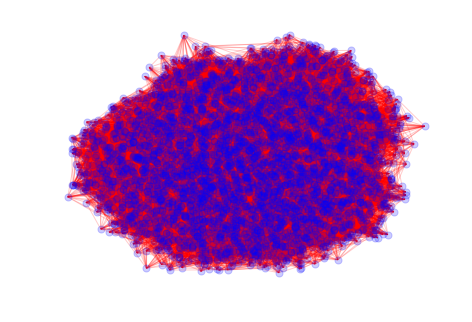

|V| =  4039
|E| =  88605
CC =  0.04454408661702569
None


In [4]:
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
#def mediation_driven_model(m,n): #pick m neighbours of the mediator, n= number of nodes
#Take m=5 for now


def  mda(n,m):
    

    A = np.ones((m+1,m+1)) - np.diag(np.ones(m+1))
    #print(A)
    B = np.zeros((n,n)) #take n=10
    B[0:m+1,0:m+1] = A 
    #print(B)
    for i in range(m+1,n):
        C = np.array(list(range(i)))
        #print(C)
        
        mediator=np.random.choice(C)
        #print(mediator)
        
        neighbor = B[mediator,:]
        #print(neighbor)
        
        neighbor_index = np.where(neighbor >0)[0]
        #print("neighbor_index=",neighbor_index)
        
        D = np.size(neighbor_index)
        #print(D)
        
        E = np.random.choice(D,m,replace=False)
        #print(E)
        
        vec_rand = np.random.choice(np.size(neighbor_index),m,replace = False) 
        #print("vec_rand=",vec_rand)
        #print(vec_rand[4])
        
        for j in range(m):
            a= neighbor_index[vec_rand[j]]
            #print(a)
            B[a,i]=1
            B[i,a]=1
        #print(B)
        
    mda=nx.Graph(B)
    #nx.draw_networkx(mda)
    nx.draw(mda, node_size = 50, node_color = 'blue', alpha = 0.2, edge_color = 'red')

    
    plt.show()
    print('|V| = ', nx.number_of_nodes(mda))
    print('|E| = ', nx.number_of_edges(mda))
    print('CC = ', nx.average_clustering(mda))


b= mda(4039,22)
print(b)


    




C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

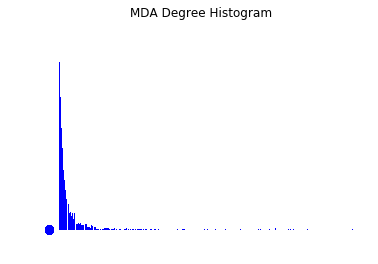

|V| =  4039
|E| =  88605
CC =  0.0439445569313


In [8]:
def  mda(n,m):
    

    A = np.ones((m+1,m+1)) - np.diag(np.ones(m+1))
    #print(A)
    B = np.zeros((n,n)) #take n=10
    B[0:m+1,0:m+1] = A 
    #print(B)
    for i in range(m+1,n):
        C = np.array(list(range(i)))
        #print(C)
        
        mediator=np.random.choice(C)
        #print(mediator)
        
        neighbor = B[mediator,:]
        #print(neighbor)
        
        neighbor_index = np.where(neighbor >0)[0]
        #print("neighbor_index=",neighbor_index)
        
        D = np.size(neighbor_index)
        #print(D)
        
        E = np.random.choice(D,m,replace=False)
        #print(E)
        
        vec_rand = np.random.choice(np.size(neighbor_index),m,replace = False) 
        #print("vec_rand=",vec_rand)
        #print(vec_rand[4])
        
        for j in range(m):
            a= neighbor_index[vec_rand[j]]
            #print(a)
            B[a,i]=1
            B[i,a]=1
        #print(B)
        
    mda=nx.Graph(B)
    #nx.draw_networkx(mda)
    nx.draw(mda, node_size = 50, node_color = 'blue', alpha = 0.2, edge_color = 'red')
    
    plt.title("MDA Degree Histogram")
    vertex_degrees = list(dict(nx.degree(mda)).values())
    plt.hist(vertex_degrees, 
     bins = int(np.max(vertex_degrees) - np.min(vertex_degrees) + 1), 
     facecolor='blue', rwidth = 0.9)



    
    plt.show()
    print('|V| = ', nx.number_of_nodes(mda))
    print('|E| = ', nx.number_of_edges(mda))
    print('CC = ', nx.average_clustering(mda))


b= mda(4039,22)

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

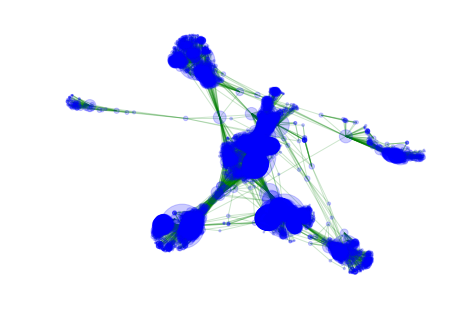

In [10]:
def nice_plot_network(G):
    v_degrees = np.array(list(dict(nx.degree(G)).values()))
    nx.draw(G, node_size = 2.5 * v_degrees, node_color = 'blue', alpha = 0.2, edge_color = 'green')
    return None

#We load the facebook data
FbData = np.loadtxt("facebook_combined.txt.gz")
FbData = FbData.astype(int)

#We plot the facebook data graph
H = nx.Graph()
H.add_edges_from(FbData)
nice_plot_network(H)
plt.show()

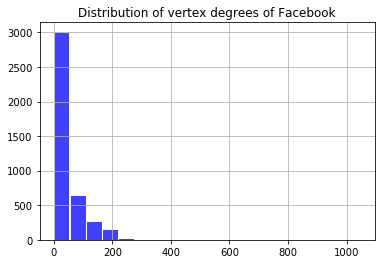

|V| =  4039
|E| =  88234
CC =  0.6055467186200876


In [11]:
vertex_degrees=list(dict(nx.degree(H)).values())
plt.title('Distribution of vertex degrees of Facebook')
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='blue', alpha=0.75, rwidth=0.9)
plt.grid(True)
plt.show()

print('|V| = ', nx.number_of_nodes(H))
print('|E| = ', nx.number_of_edges(H))
print('CC = ', nx.average_clustering(H))

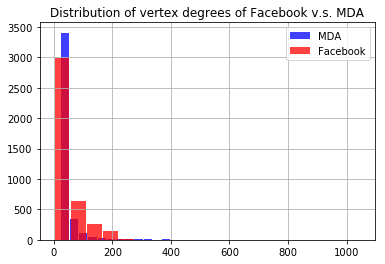

Facebook
|V| =  4039
|E| =  88234
CC =  0.6055467186200876
Average path length =  3.6925068496963913
Average degree =  43.69101262688784
Number of triangles =  1612010.0
Diameter =  8

Average path length =  2.5098262470874304
Average degree =  43.874721465709335
Number of triangles =  105243.0
Diameter =  4


In [20]:
vertex_degrees=list(dict(nx.degree(H)).values())
plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='red', label = 'Facebook', alpha=0.75, rwidth=0.9)

plt.title('Distribution of vertex degrees of Facebook v.s. MDA')

plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

print('Facebook')
print('|V| = ', nx.number_of_nodes(H))
print('|E| = ', nx.number_of_edges(H))
print('CC = ', nx.average_clustering(H))
print('Average path length = ', nx.average_shortest_path_length(H))
print('Average degree = ', (2*nx.number_of_edges(H)/nx.number_of_nodes(H)))
print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(H).todense()**3))/6))
print('Diameter = ', nx.diameter(H))

print('')

def  mda(n,m):
    

    A = np.ones((m+1,m+1)) - np.diag(np.ones(m+1))
    #print(A)
    B = np.zeros((n,n)) #take n=10
    B[0:m+1,0:m+1] = A 
    #print(B)
    for i in range(m+1,n):
        C = np.array(list(range(i)))
        #print(C)
        
        mediator=np.random.choice(C)
        #print(mediator)
        
        neighbor = B[mediator,:]
        #print(neighbor)
        
        neighbor_index = np.where(neighbor >0)[0]
        #print("neighbor_index=",neighbor_index)
        
        D = np.size(neighbor_index)
        #print(D)
        
        E = np.random.choice(D,m,replace=False)
        #print(E)
        
        vec_rand = np.random.choice(np.size(neighbor_index),m,replace = False) 
        #print("vec_rand=",vec_rand)
        #print(vec_rand[4])
        
        for j in range(m):
            a= neighbor_index[vec_rand[j]]
            #print(a)
            B[a,i]=1
            B[i,a]=1
        #print(B)
        
    mda=nx.Graph(B)
        
    plt.show()
    vertex_degrees=list(dict(nx.degree(mda)).values())
    plt.hist(vertex_degrees, bins = np.linspace(np.min(vertex_degrees),1 + np.max(vertex_degrees), 20), facecolor='blue', label = 'MDA', alpha=0.75, rwidth=0.9)


    print('Average path length = ', nx.average_shortest_path_length(mda))
    print('Average degree = ', (2*nx.number_of_edges(mda)/nx.number_of_nodes(mda)))
    print('Number of triangles = ', np.trace(np.matrix((nx.adj_matrix(mda).todense()**3))/6))
    print('Diameter = ', nx.diameter(mda))

b= mda(4039,22)

Based on the results generated above, we observed that the number of edges formed for the MDA model is slightly higher than the Facebook model. The small difference is due to the fact that Facebook have different characteristic from a MDA random network model. More importantly, observe that there is a huge difference between their clustering coefficient with Facebook having a CC = 0.6055 while a MDA having a low CC = 0.0445. This phenomenon is due to Facebook random network having a preferential in the way vertices are joined while for a random MDA network they have a random mediator.

Hence we can conclude that the MDA network model describes poorly about the nature of Facebook network